<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [2]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

In [31]:
# datos
cookies=pd.read_csv('data/cookie_cats.csv')
cookies.userid.value_counts()
#no duplicated userid

116        1
6632278    1
6658202    1
6658194    1
6658134    1
          ..
3347358    1
3347337    1
3346992    1
3346979    1
9999861    1
Name: userid, Length: 90189, dtype: int64

In [34]:
cookies.version.value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [36]:
cookies.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [105]:
cross=pd.crosstab(cookies.version, cookies.retention_1)
cross

retention_1,False,True
version,,
gate_30,24666,20034
gate_40,25370,20119


In [106]:
# transformacion


In [107]:
# muestreo


In [108]:
# testeo para retention_1

imps_ctrl, convs_ctrl = 44700, 20034
imps_test, convs_test= 45489, 20119

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test

f'TASAS: Control={CR_ctrl}, Test={CR_test}'

'TASAS: Control=0.4481879194630872, Test=0.44228274967574577'

In [109]:
from scipy.stats import bernoulli, beta   
a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

beta_control.mean(), beta_test.mean()

(0.44819023757326293, 0.44228528719966587)

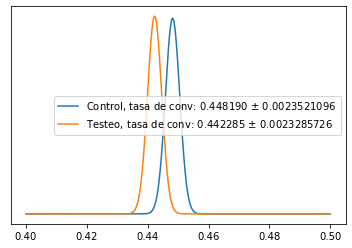

In [110]:
x=np.linspace(0.4, 0.5, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();
    
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [111]:
salto=(beta_test.mean()-beta_control.mean())/beta_control.mean()

salto

-0.013175098158249857

In [112]:
!pip install mpmath
from mpmath import betainc   # integral de beta
from scipy.stats import beta

In [113]:
1- beta_control.cdf(0.446)

0.824105657484133

In [115]:
prob=1- beta_control.cdf(0.446)

prob=float(prob)

prob

0.824105657484133

In [116]:
'''El test decrece la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test decrece la tasa de conversion en un -1.32%, con una probabilidad del 82.41%'

In [118]:
# testeo para retention_7
cross2=pd.crosstab(cookies.version, cookies.retention_7)
cross2


retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


In [119]:
imps_ctrl, convs_ctrl = 44700, 8502
imps_test, convs_test= 45489, 8279

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test

f'TASAS: Control={CR_ctrl}, Test={CR_test}'

'TASAS: Control=0.19020134228187918, Test=0.18200004396667327'

In [120]:
a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)

beta_control.mean(), beta_test.mean()

(0.19021520289919913, 0.18201402475214878)

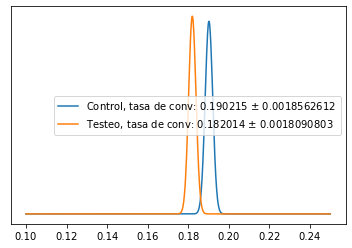

In [121]:
x=np.linspace(0.1, 0.25, 1000)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();
    
plot([beta_control, beta_test], ['Control', 'Testeo'])

In [122]:
salto=(beta_test.mean()-beta_control.mean())/beta_control.mean()

salto

-0.04311526114658881

In [127]:
prob=1- beta_control.cdf(0.186)

prob=float(prob)

prob

0.9887346805864391

In [128]:
'''El test decrece la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El test decrece la tasa de conversion en un -4.31%, con una probabilidad del 98.87%'

In [ ]:
# conclusiones
# En ambos tests, la versión de prueba no tiene mejores resultados que el control.